In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

df = pd.read_csv('global_electricity_stats.csv')


num_rows, num_columns = df.shape
# count rows and columns
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

#count missing values
missing_values = df.isnull().sum()
missing_values += (df == '').sum()
print("Missing values count for each column:")
print(missing_values)
total_missing_values = missing_values.sum()
print(f"Total missing values in the dataset: {total_missing_values}")

df.head()

The dataset has 1610 rows and 45 columns.
Missing values count for each column:
Country      0
Features     0
Region       0
1980        28
1981        28
1982        28
1983        28
1984        28
1985        28
1986        28
1987        28
1988        28
1989        28
1990        28
1991        28
1992        28
1993        28
1994        28
1995        28
1996        28
1997        28
1998        28
1999        28
2000        28
2001        28
2002        28
2003        28
2004        28
2005        28
2006        28
2007        28
2008        28
2009        28
2010        28
2011        28
2012        28
2013        28
2014        28
2015        28
2016        28
2017        28
2018        28
2019        28
2020        31
2021        26
dtype: int64
Total missing values in the dataset: 1177


,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [2]:
years = [str(year) for year in range(1980, 2022)]
features = df['Features'].unique()
print(features)

regions = df['Region'].unique()
print(regions)

['net generation' 'net consumption' 'imports' 'exports' 'net imports'
 'installed capacity' 'distribution losses']
['Africa' 'Eurasia' 'Europe' 'Asia & Oceania' 'Middle East'
 'North America' 'Central & South America']


In [3]:
# Create Energy Need Target Column
# Energy Need = Net Consumption + Distribution Losses + Exports − Net Generation − Net Import

region_dataframes = {}

for region in regions:
    means_data = pd.DataFrame(index=features, columns=years)

    region_data = df[df['Region'] == region]
    region_data = region_data.drop(['Region', 'Country'], axis=1)

    for feature in features:
        region_feature = region_data[region_data["Features"] == feature]
        region_feature = region_feature.drop(['Features'], axis=1)

        for year in years:
            # Convert the year column to numeric
            region_feature[year] = pd.to_numeric(region_feature[year], errors='coerce')

            # Calculate the mean
            mean = region_feature[year].mean()

            # Store the mean in the means_data DataFrame
            means_data.at[feature, year] = mean

    # Store the means_data DataFrame in the region_dataframes dictionary
    region_dataframes[region] = means_data.T

for region in region_dataframes:
    df = region_dataframes[region]
    
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate energy need
    df['energy need'] = df['net consumption'] + df['distribution losses'] + df['exports'] - df['net generation'] - df['net imports']
    
    # Fill NaN values in 'energy need' with zeros
    df['energy need'] = df['energy need'].fillna(0)

    # Update the DataFrame in the dictionary
    region_dataframes[region] = df

# Display the DataFrame for 'Africa' to verify
region_dataframes['Africa'].head()


,net generation,net consumption,imports,exports,net imports,installed capacity,distribution losses,energy need
1980,3.496019,3.155499,0.070926,0.070926,0.000000e+00,0.879849,0.340520,0.070926
1981,3.705439,3.333403,0.078185,0.078185,8.223874e-18,0.969516,0.372036,0.078185
1982,3.829026,3.456015,0.090611,0.090444,1.666667e-04,0.986479,0.373177,0.090444
1983,3.988430,3.578041,0.081926,0.076778,5.148148e-03,1.031105,0.415537,0.076778
1984,4.345869,3.903158,0.084074,0.08313,9.444444e-04,1.112568,0.443655,0.083130



Summary Statistics for 'Energy Need' Column in Africa:
count    42.00000
mean      0.28951
std       0.19251
min       0.04300
25%       0.09098
50%       0.31253
75%       0.44755
max       0.61697
Name: energy need, dtype: float64

Missing Values for 'Energy Need' Column in Africa:
0


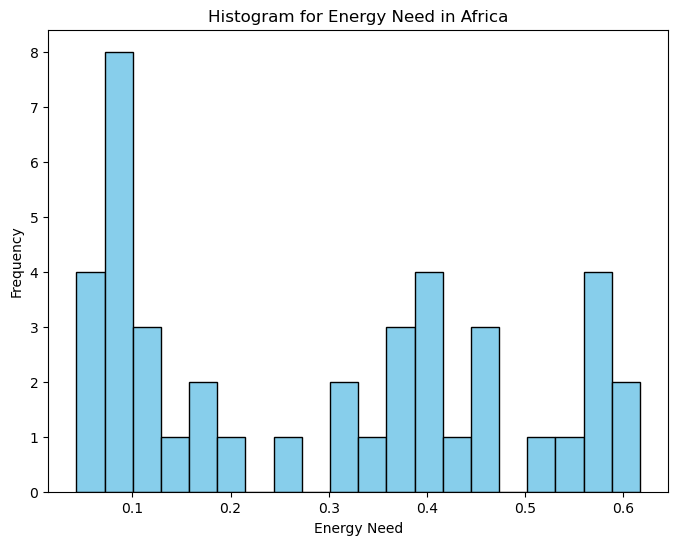

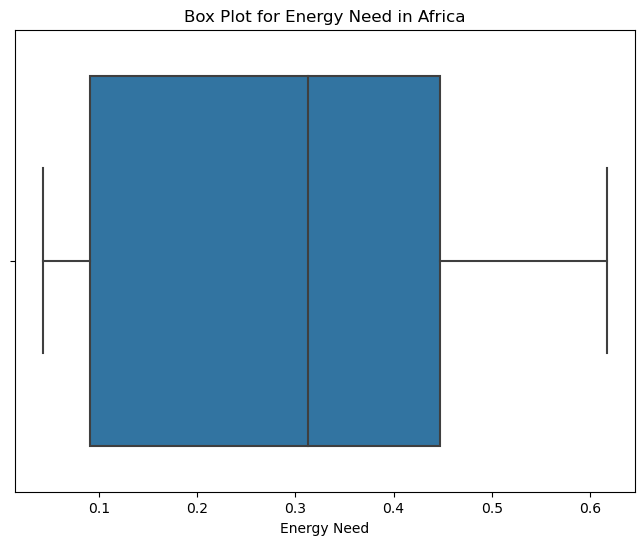


Correlation Matrix for Continuous Features including 'Energy Need' in Africa:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99908      0.63843   
net consumption             0.99908          1.00000      0.65180   
net imports                 0.63843          0.65180      1.00000   
distribution losses         0.99168          0.98576      0.61455   
energy need                 0.76528          0.78197      0.48296   

                     distribution losses  energy need  
net generation                   0.99168      0.76528  
net consumption                  0.98576      0.78197  
net imports                      0.61455      0.48296  
distribution losses              1.00000      0.72196  
energy need                      0.72196      1.00000  

Summary Statistics for 'Energy Need' Column in Eurasia:
count    42.00000
mean     11.57621
std      11.21969
min       2.94272
25%       4.14008
50%       5.14080
75%  

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)


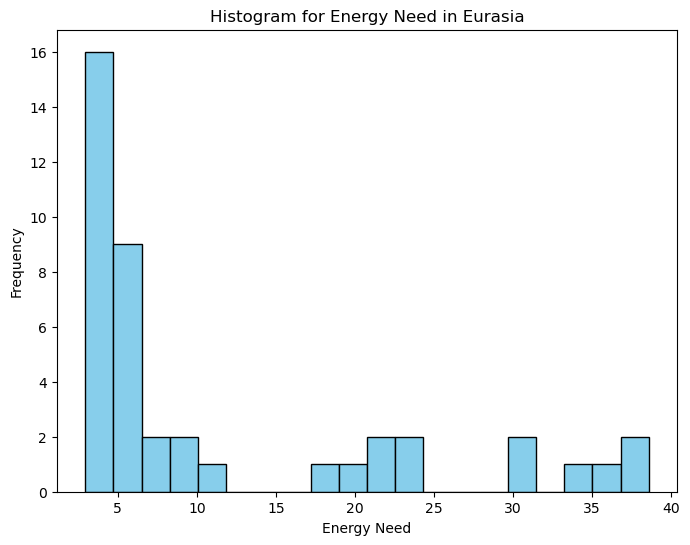

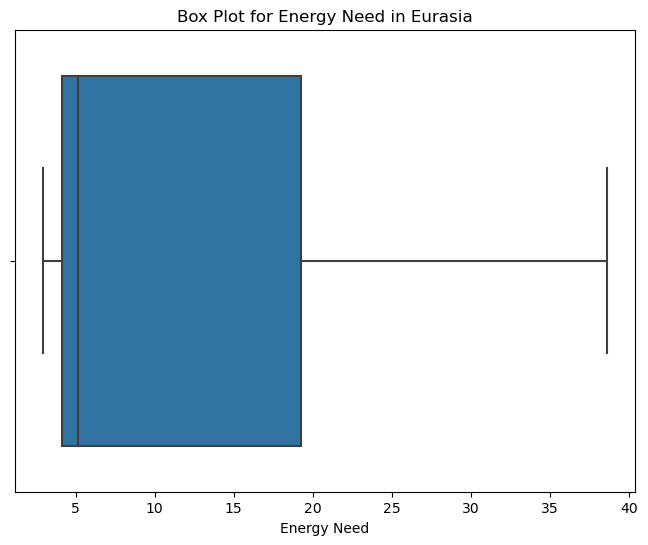


Correlation Matrix for Continuous Features including 'Energy Need' in Eurasia:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99997     -0.97353   
net consumption             0.99997          1.00000     -0.97199   
net imports                -0.97353         -0.97199      1.00000   
distribution losses         0.99874          0.99839     -0.97633   
energy need                 0.95199          0.95015     -0.98563   

                     distribution losses  energy need  
net generation                   0.99874      0.95199  
net consumption                  0.99839      0.95015  
net imports                     -0.97633     -0.98563  
distribution losses              1.00000      0.95658  
energy need                      0.95658      1.00000  

Summary Statistics for 'Energy Need' Column in Europe:
count    42.00000
mean      7.53244
std       2.76732
min       2.93477
25%       5.40548
50%       7.76928
75%  

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)


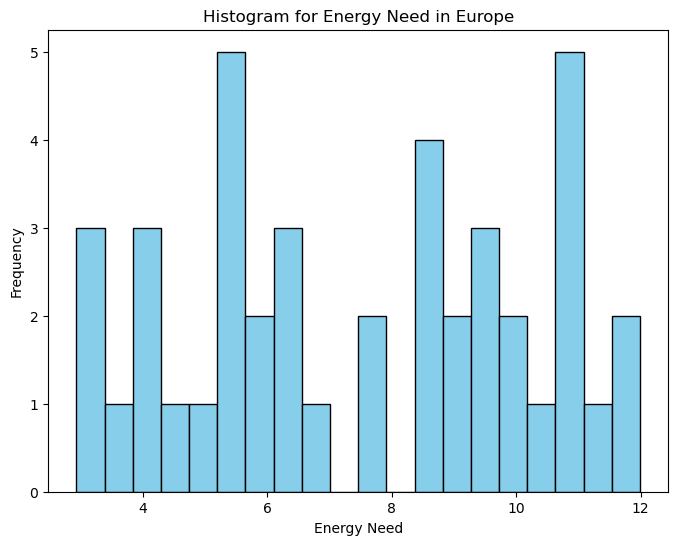

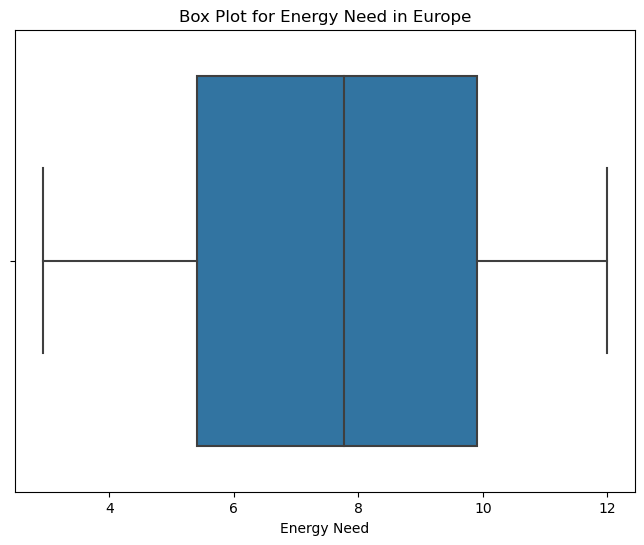

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)



Correlation Matrix for Continuous Features including 'Energy Need' in Europe:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99741     -0.26754   
net consumption             0.99741          1.00000     -0.20593   
net imports                -0.26754         -0.20593      1.00000   
distribution losses         0.87328          0.84207     -0.44890   
energy need                 0.85874          0.83909     -0.59388   

                     distribution losses  energy need  
net generation                   0.87328      0.85874  
net consumption                  0.84207      0.83909  
net imports                     -0.44890     -0.59388  
distribution losses              1.00000      0.75251  
energy need                      0.75251      1.00000  

Summary Statistics for 'Energy Need' Column in Asia & Oceania:
count    42.00000
mean      0.52848
std       0.50824
min       0.02573
25%       0.10110
50%       0.3754

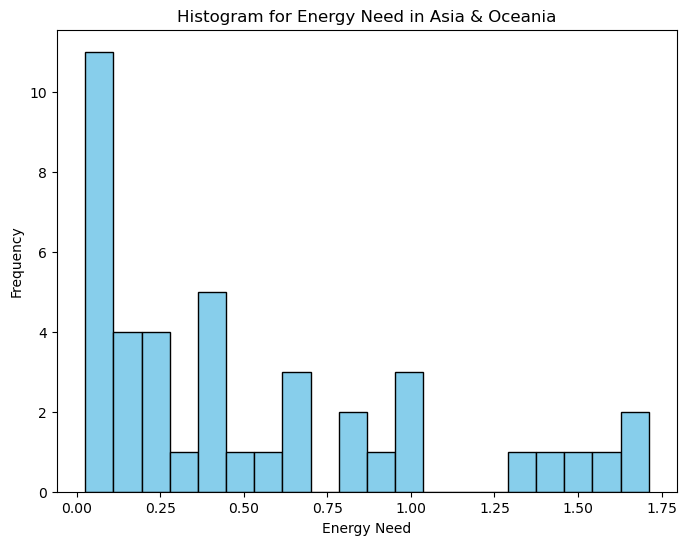

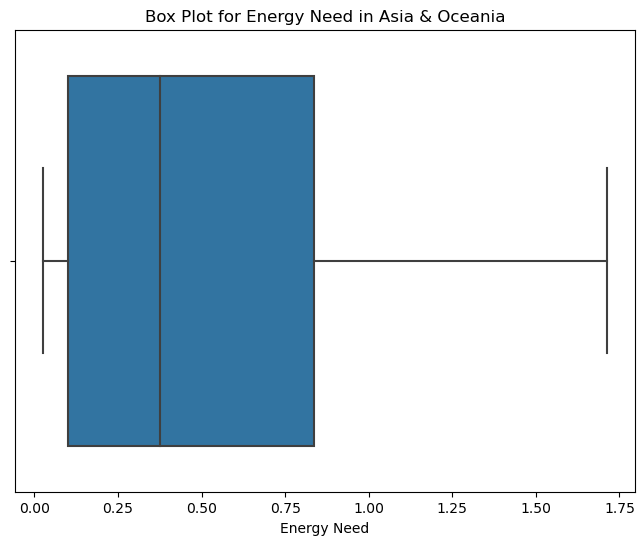


Correlation Matrix for Continuous Features including 'Energy Need' in Asia & Oceania:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99988      0.91879   
net consumption             0.99988          1.00000      0.92121   
net imports                 0.91879          0.92121      1.00000   
distribution losses         0.97450          0.97083      0.86169   
energy need                 0.99039          0.99160      0.89931   

                     distribution losses  energy need  
net generation                   0.97450      0.99039  
net consumption                  0.97083      0.99160  
net imports                      0.86169      0.89931  
distribution losses              1.00000      0.94580  
energy need                      0.94580      1.00000  

Summary Statistics for 'Energy Need' Column in Middle East:
count    42.00000
mean      0.40960
std       0.44250
min       0.01531
25%       0.03169
50%       0

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)


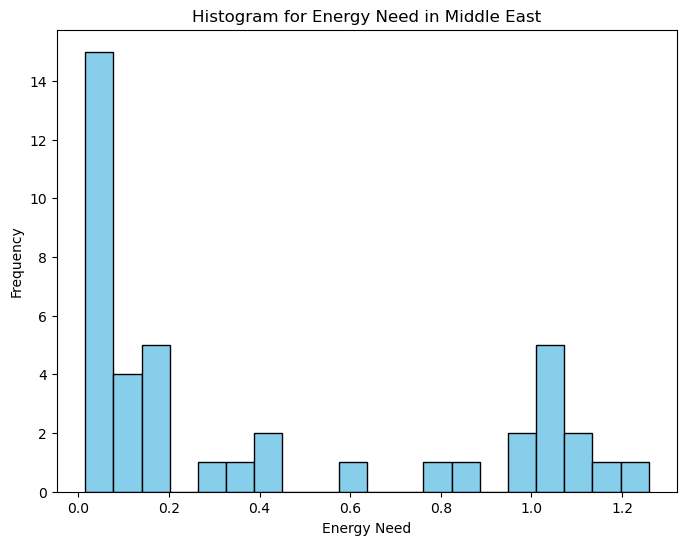

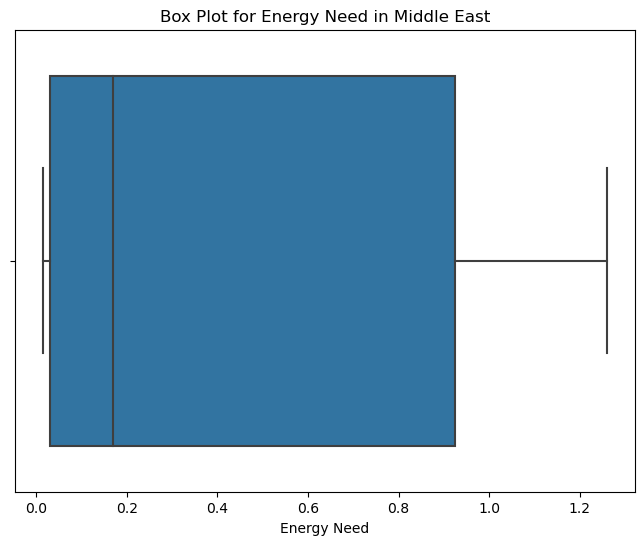


Correlation Matrix for Continuous Features including 'Energy Need' in Middle East:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99982      0.80587   
net consumption             0.99982          1.00000      0.81105   
net imports                 0.80587          0.81105      1.00000   
distribution losses         0.99465          0.99292      0.81004   
energy need                 0.95265          0.95211      0.70265   

                     distribution losses  energy need  
net generation                   0.99465      0.95265  
net consumption                  0.99292      0.95211  
net imports                      0.81004      0.70265  
distribution losses              1.00000      0.94217  
energy need                      0.94217      1.00000  

Summary Statistics for 'Energy Need' Column in North America:
count    42.00000
mean      9.59601
std       2.83091
min       4.02298
25%       7.28960
50%       9.

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)


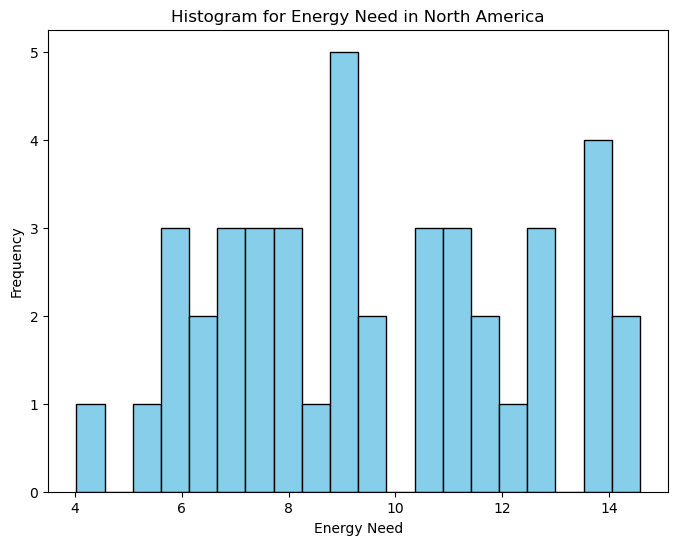

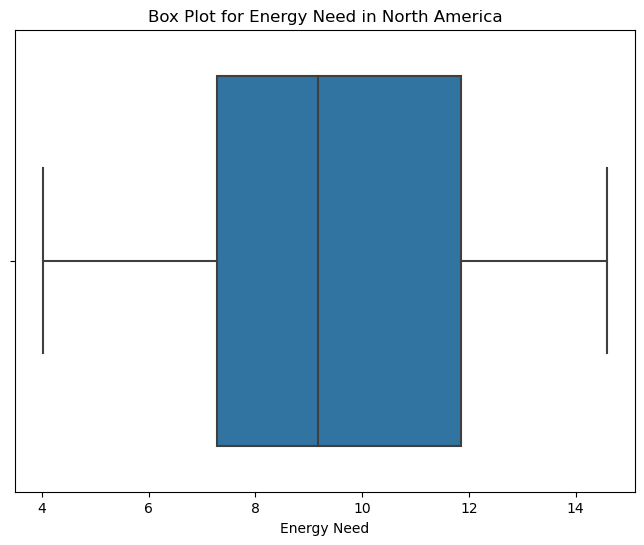

C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)



Correlation Matrix for Continuous Features including 'Energy Need' in North America:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99966      0.04186   
net consumption             0.99966          1.00000      0.04144   
net imports                 0.04186          0.04144      1.00000   
distribution losses         0.86781          0.85468      0.10485   
energy need                 0.82334          0.82717     -0.04858   

                     distribution losses  energy need  
net generation                   0.86781      0.82334  
net consumption                  0.85468      0.82717  
net imports                      0.10485     -0.04858  
distribution losses              1.00000      0.63185  
energy need                      0.63185      1.00000  

Summary Statistics for 'Energy Need' Column in Central & South America:
count    42.00000
mean      0.41477
std       0.71637
min      -0.92874
25%       0.01016


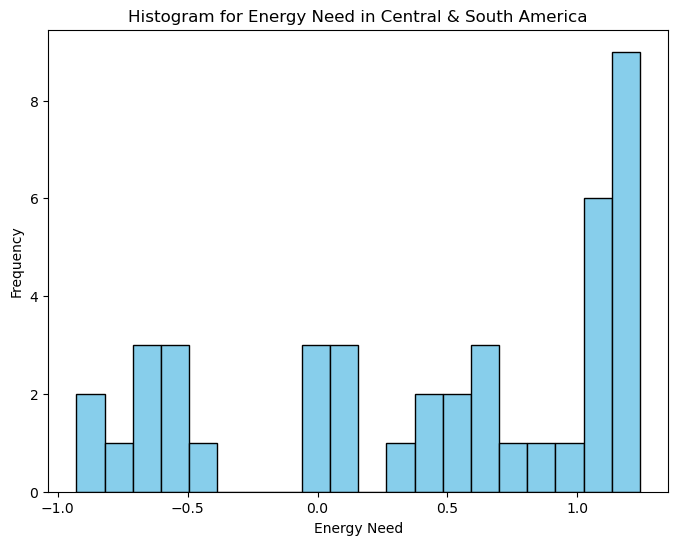

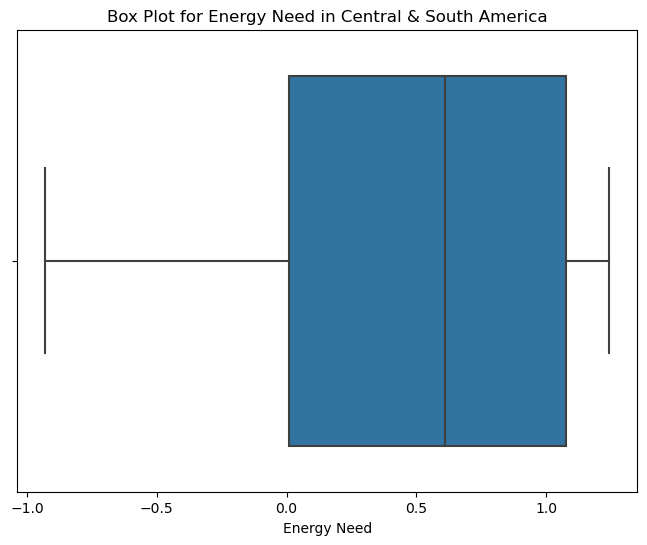


Correlation Matrix for Continuous Features including 'Energy Need' in Central & South America:
                     net generation  net consumption  net imports  \
net generation              1.00000          0.99836      0.33063   
net consumption             0.99836          1.00000      0.34755   
net imports                 0.33063          0.34755      1.00000   
distribution losses         0.99263          0.99340      0.37605   
energy need                -0.41661         -0.37215      0.16091   

                     distribution losses  energy need  
net generation                   0.99263     -0.41661  
net consumption                  0.99340     -0.37215  
net imports                      0.37605      0.16091  
distribution losses              1.00000     -0.32877  
energy need                     -0.32877      1.00000  


C:\Users\khangt\AppData\Local\Temp\ipykernel_20564\2374653760.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_energy = df_region.corr().round(5)


In [9]:
region_dataframes = {}

# Iterate over regions
for region in regions:
    means_data = pd.DataFrame(index=features, columns=years)

    region_data = df[df['Region'] == region]
    region_data = region_data.drop(['Region', 'Country'], axis=1)

    for feature in features:
        region_feature = region_data[region_data["Features"] == feature]
        region_feature = region_feature.drop(['Features'], axis=1)

        for year in years:
            # Convert the year column to numeric
            region_feature[year] = pd.to_numeric(region_feature[year], errors='coerce')

            # Calculate the mean
            mean = region_feature[year].mean()

            # Store the mean in the means_data DataFrame
            means_data.at[feature, year] = mean

    # Store the means_data DataFrame in the region_dataframes dictionary
    region_dataframes[region] = means_data.T

# Perform Data Quality Report for Continuous Features

for region, df_region in region_dataframes.items():
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df_region[col] = pd.to_numeric(df_region[col], errors='coerce')

    # Calculate energy need
    df_region['energy need'] = df_region['net consumption'] + df_region['distribution losses'] + df_region['exports'] - df_region['net generation'] - df_region['net imports']

    # Fill NaN values in 'energy need' with zeros
    df_region['energy need'] = df_region['energy need'].fillna(0)

    # Display the summary statistics for the 'energy need' column
    energy_need_stats = df_region['energy need'].describe().round(5)
    print(f"\nSummary Statistics for 'Energy Need' Column in {region}:")
    print(energy_need_stats)

    # Count missing values for 'energy need' column
    missing_values_energy_need = df_region['energy need'].isnull().sum()
    print(f"\nMissing Values for 'Energy Need' Column in {region}:")
    print(missing_values_energy_need)

    # Plot histogram for 'energy need' column
    plt.figure(figsize=(8, 6))
    plt.hist(df_region['energy need'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for Energy Need in {region}')
    plt.xlabel('Energy Need')
    plt.ylabel('Frequency')
    plt.show()

    # Plot box plot for 'energy need' column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_region['energy need'])
    plt.title(f'Box Plot for Energy Need in {region}')
    plt.xlabel('Energy Need')
    plt.show()

    # Calculate correlation matrix for continuous features including 'energy need'
    correlation_matrix_energy = df_region.corr().round(5)

    # Display the correlation matrix
    print(f"\nCorrelation Matrix for Continuous Features including 'Energy Need' in {region}:")
    print(correlation_matrix_energy)

    # Save the updated dataframe with the 'energy need' column
    df_region.to_csv(f'{region}_data.csv', index=True)

In [4]:
# # Decision Tree Regression
# from sklearn.tree import DecisionTreeRegressor

# # Iterate over each region in region_dataframes
# for region in region_dataframes:
#     # Prepare the data for the specific region
#     region_energy_df = region_dataframes[region]['energy need'].reset_index()
#     region_energy_df.columns = ['Year', 'energy need']
#     region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

#     # Split the DataFrame into features (X) and target (y)
#     X = region_energy_df[['Year']]
#     y = region_energy_df['energy need']

#     # Fit the regression model to the historical data
#     regressor = DecisionTreeRegressor(random_state=0)
#     regressor.fit(X, y)

#     # Prepare the forecast years
#     max_year = X['Year'].max()
#     forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

#     # Create a DataFrame for the forecast data
#     forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
#     forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

#     # Combine historical and forecast data for plotting
#     combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

#     # Plotting the historical and forecasted 'energy need'
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
#     sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

#     plt.title(f'Forecast of {region} Energy Need')
#     plt.xlabel('Year')
#     plt.ylabel('Energy Need (billion kWh)')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


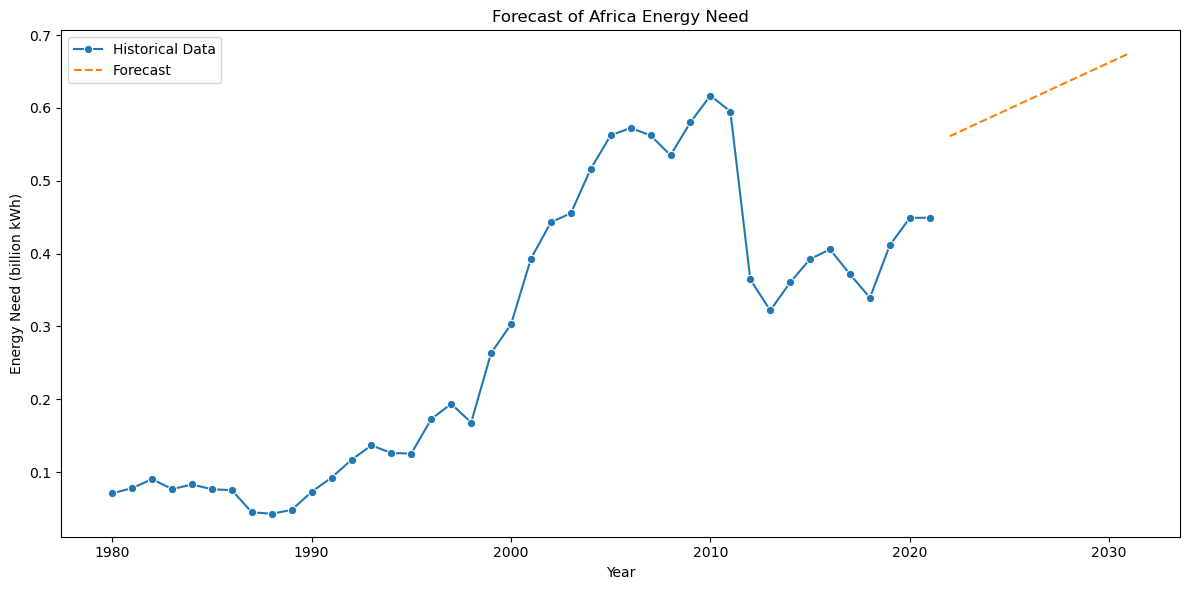

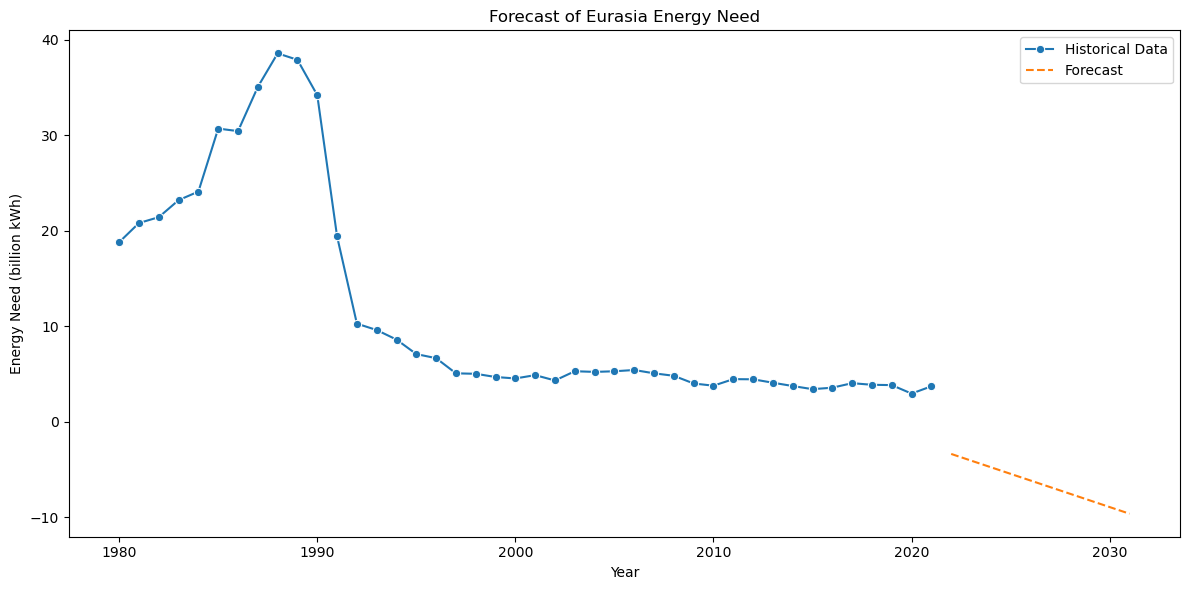

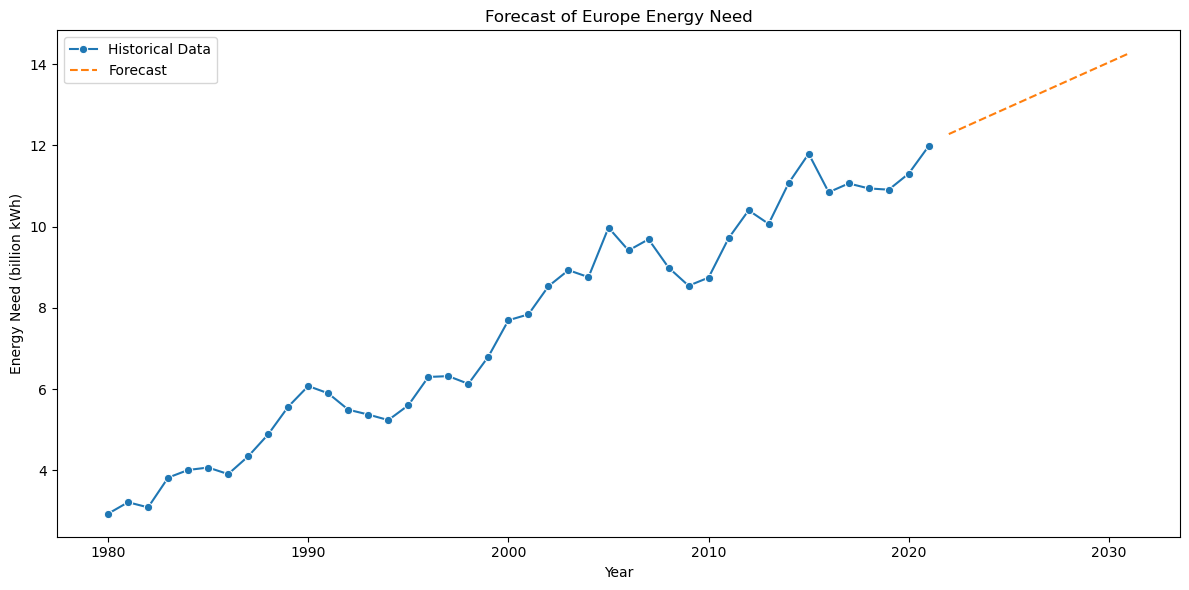

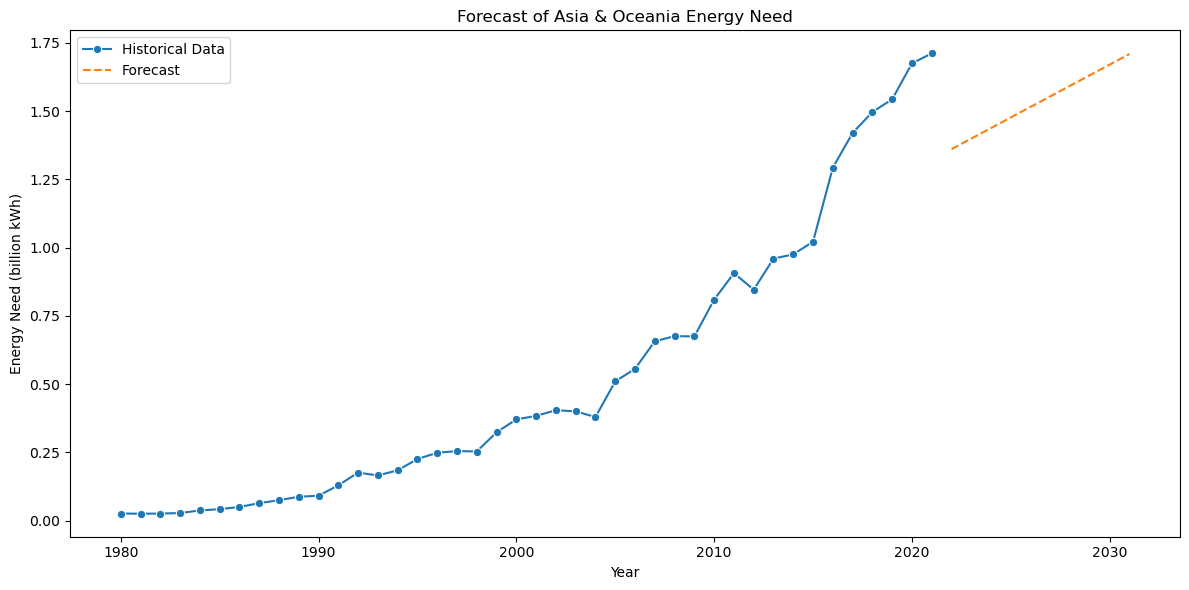

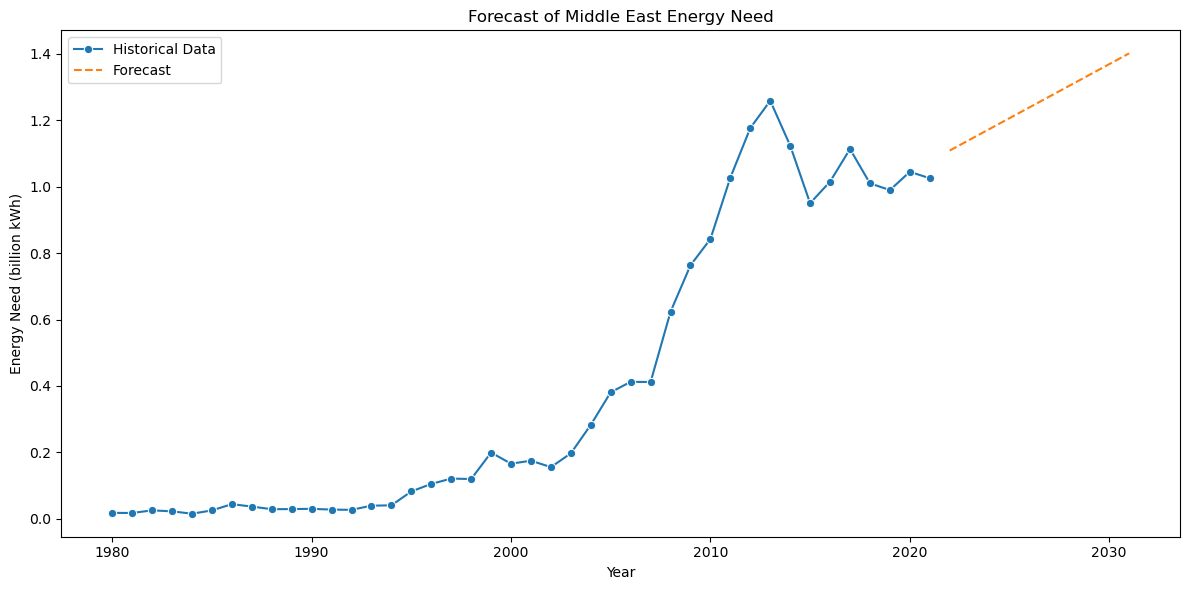

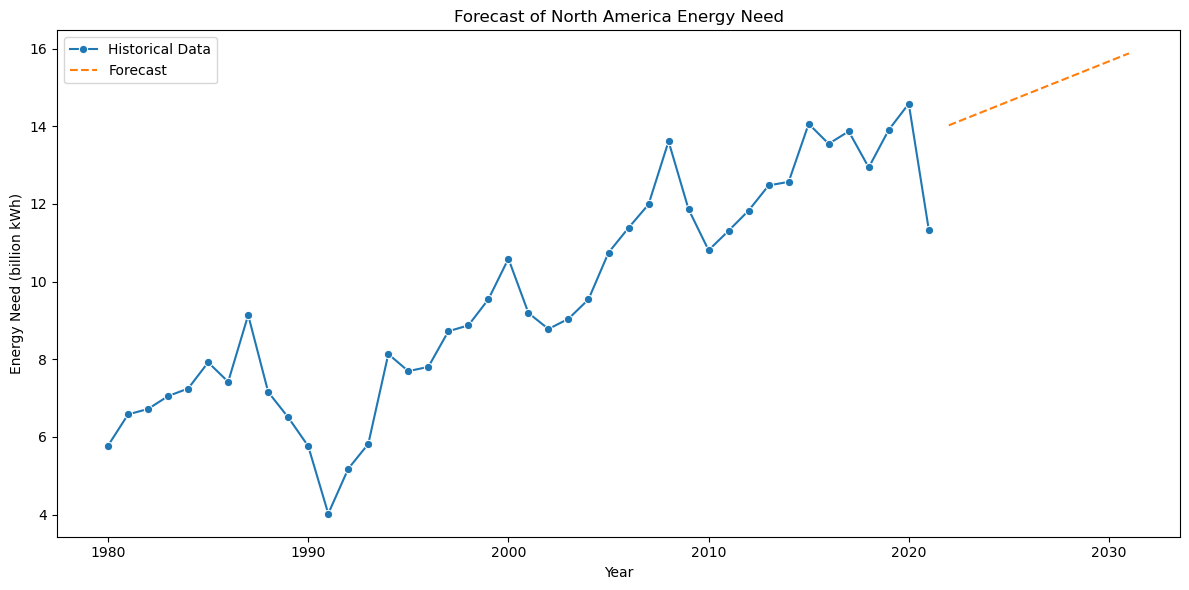

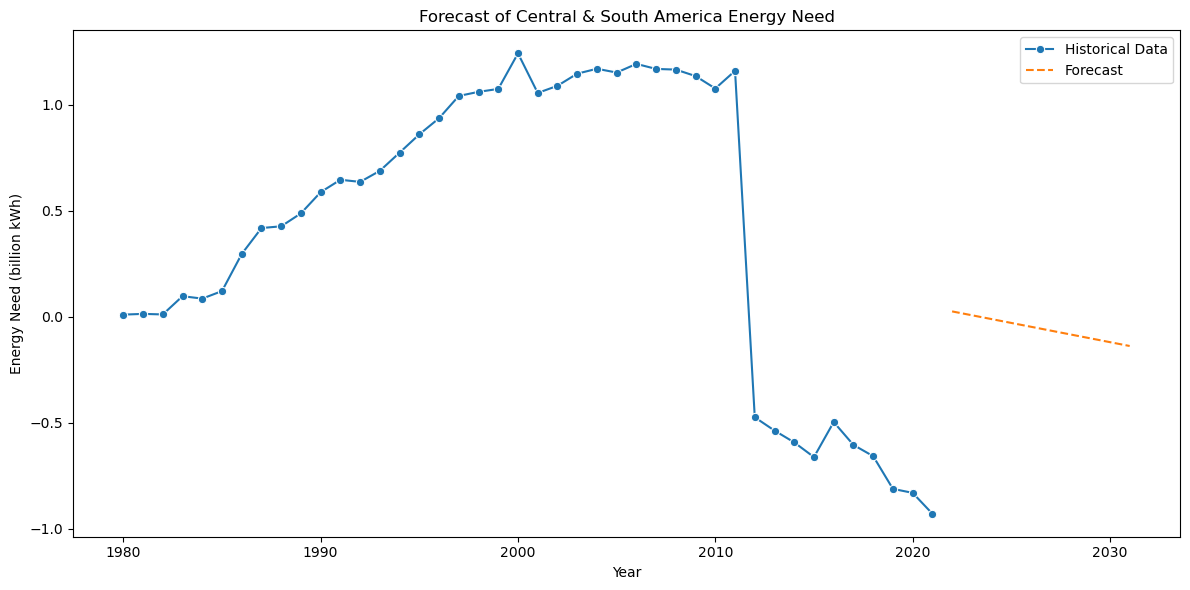

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Iterate over each region in region_dataframes
for region in region_dataframes:
    # Prepare the data for the specific region
    region_energy_df = region_dataframes[region]['energy need'].reset_index()
    region_energy_df.columns = ['Year', 'energy need']
    region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

    # Split the DataFrame into features (X) and target (y)
    X = region_energy_df[['Year']]
    y = region_energy_df['energy need']

    # Fit the regression model to the historical data
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Prepare the forecast years
    max_year = X['Year'].max()
    forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
    forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

    # Combine historical and forecast data for plotting
    combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

    # Plotting the historical and forecasted 'energy need'
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
    sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

    plt.title(f'Forecast of {region} Energy Need')
    plt.xlabel('Year')
    plt.ylabel('Energy Need (billion kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

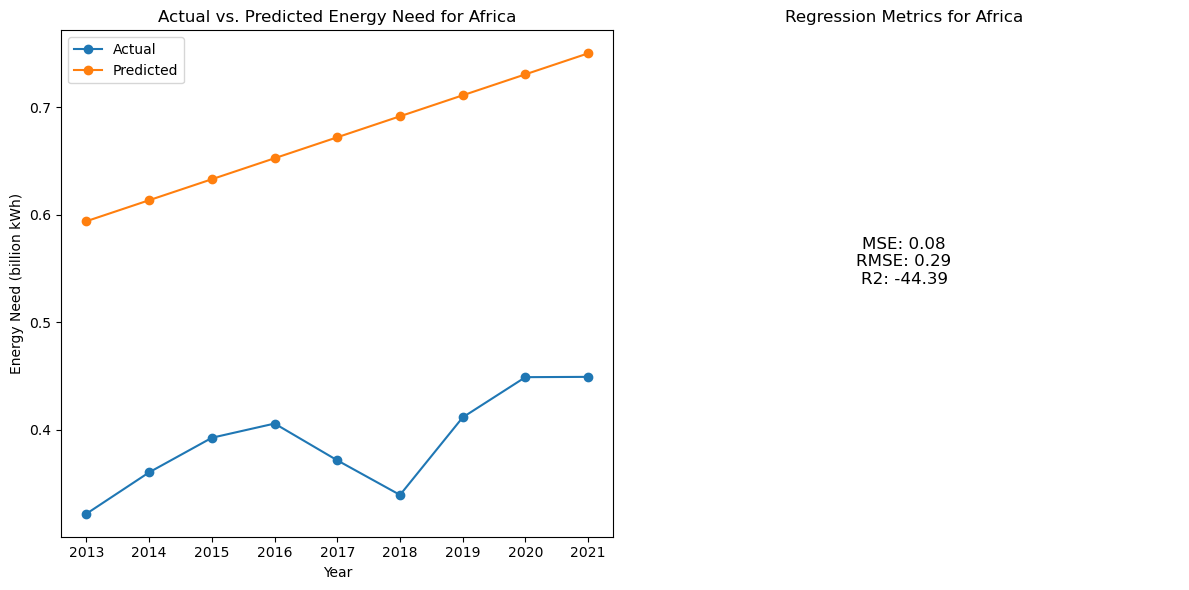

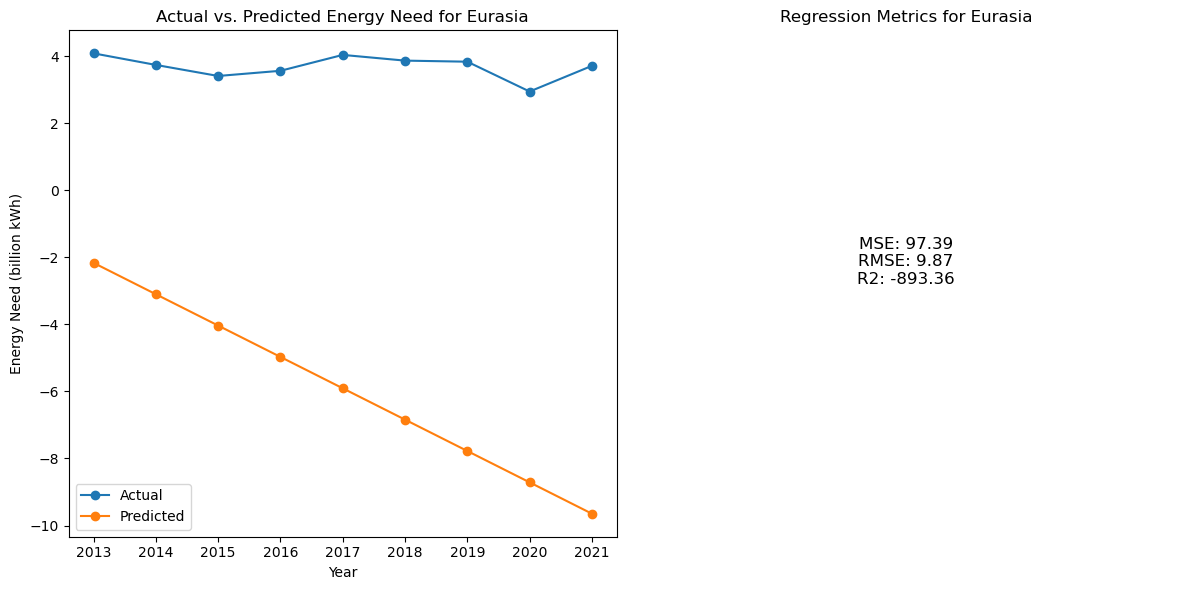

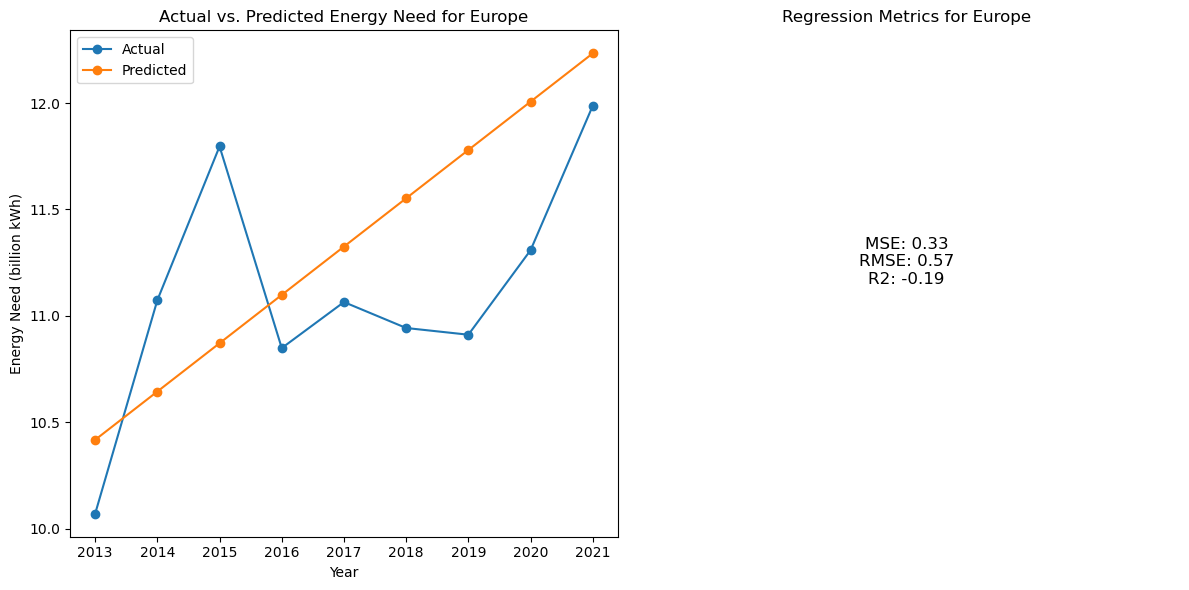

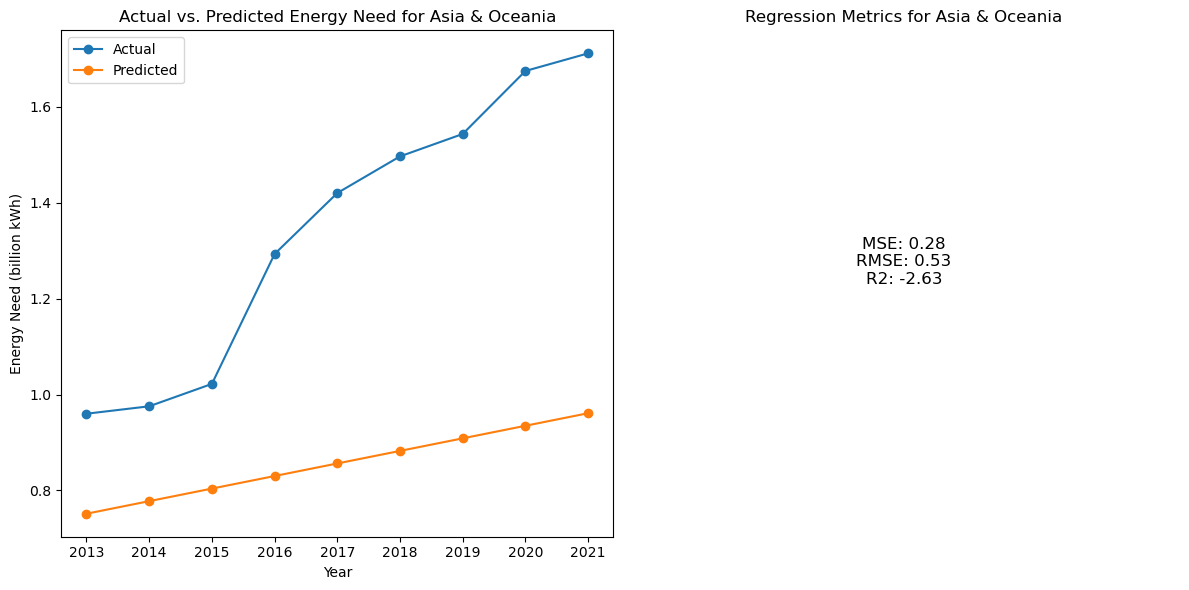

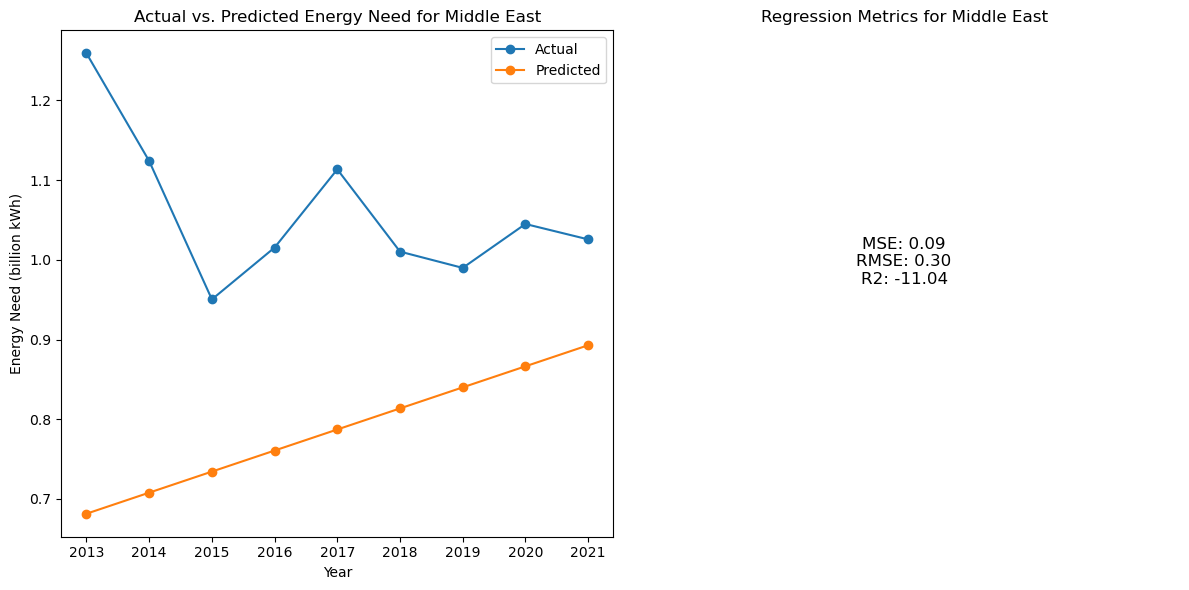

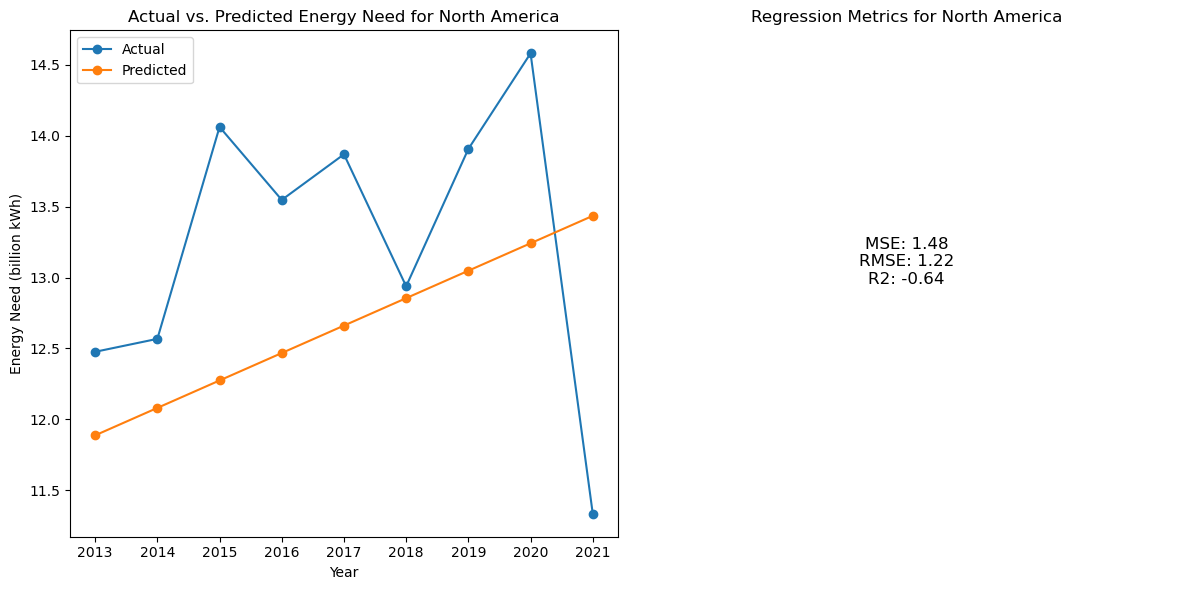

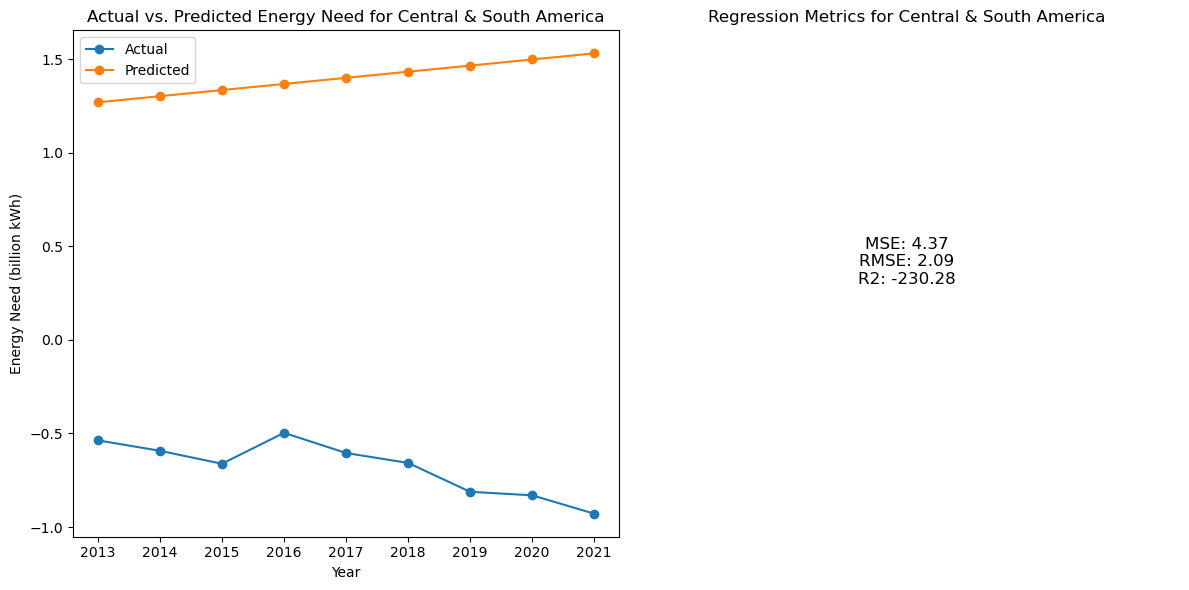

In [6]:
# Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score

for region in region_dataframes:
    # Prepare the data for the specific region
    region_energy_df = region_dataframes[region]['energy need'].reset_index()
    region_energy_df.columns = ['Year', 'energy need']
    region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

    # Split the DataFrame into features (X) and target (y)
    X = region_energy_df[['Year']]
    y = region_energy_df['energy need']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Fit the regression model to the training data
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regressor.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Plotting the Actual vs. Predicted Energy Need
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X_test, y_test, marker='o', label='Actual')
    plt.plot(X_test, y_pred, marker='o', label='Predicted')
    plt.title(f'Actual vs. Predicted Energy Need for {region}')
    plt.xlabel('Year')
    plt.ylabel('Energy Need (billion kWh)')
    plt.legend()

    # Displaying the regression metrics
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}', 
             fontsize=12, ha='center')
    plt.axis('off')
    plt.title(f'Regression Metrics for {region}')
    
    plt.tight_layout()
    plt.show()